Bag of Visual Words (BoVW)

In [3]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans

# takes all images and convert them to grayscale. 
# return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
  images = {}
  for filename in os.listdir(folder):
      category = []
      path = folder + "/" + filename
      for cat in os.listdir(path):
          img = cv2.imread(path + "/" + cat,0)
          #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          if img is not None:
              category.append(img)
      images[filename] = category
  return images

images = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/data/dataset/bukit')  # take all images category by category 

In [4]:
# read images in folder as array
def load_images_as_arrays(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images2 = load_images_as_arrays('/content/drive/MyDrive/Colab Notebooks/data/dataset/bukit/bukit_tresek')

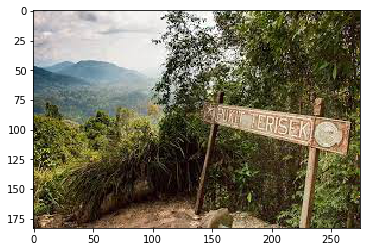

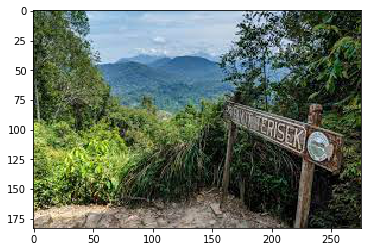

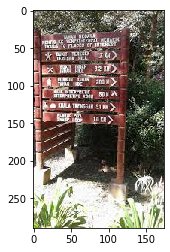

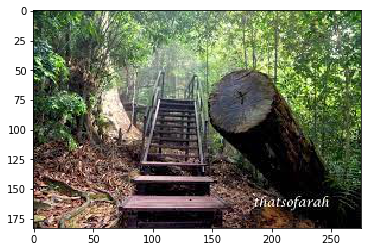

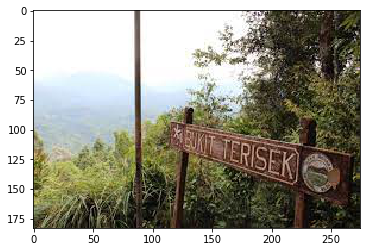

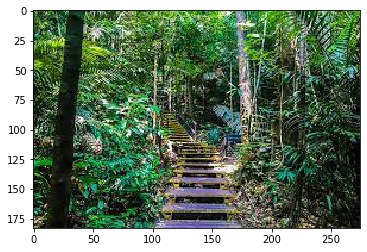

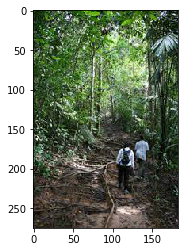

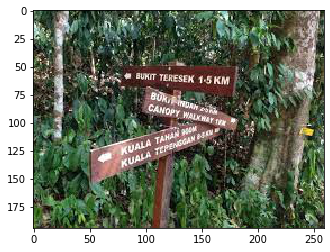

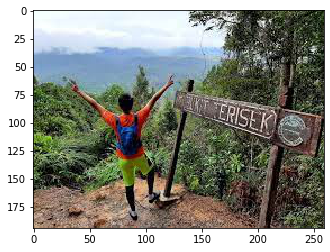

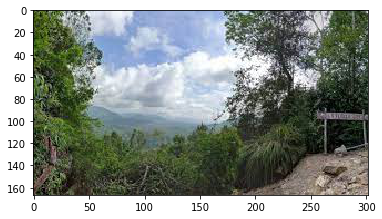

In [5]:
# display all images in folder
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def display_images(folder, images):
    for filename in os.listdir(folder):
        image = mpimg.imread(os.path.join(folder,filename))
        plt.imshow(image, interpolation='nearest')
        plt.show()
        
display_images('/content/drive/MyDrive/Colab Notebooks/data/dataset/bukit/bukit_tresek', images2)

In [6]:
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv2.xfeatures2d.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)          
            descriptor_list.extend(des)
            features.append(des)
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]

sifts = sift_features(images) 
# Takes the descriptor list which is unordered one
descriptor_list = sifts[0] 
# Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1] 

In [7]:
len(descriptor_list)

5809

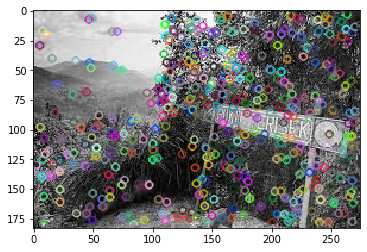

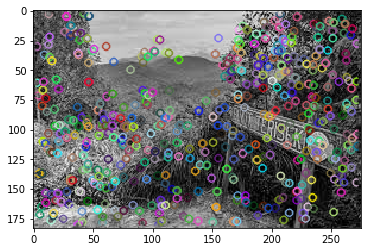

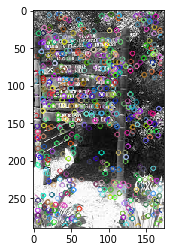

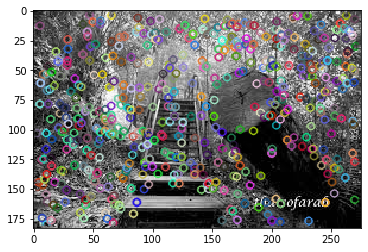

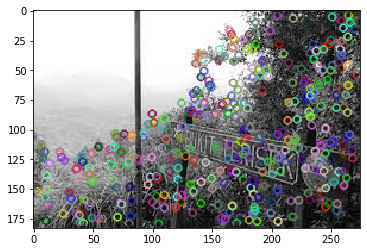

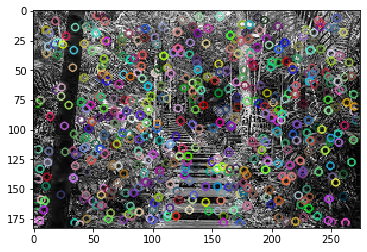

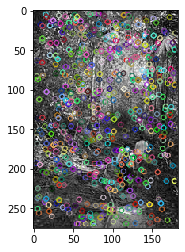

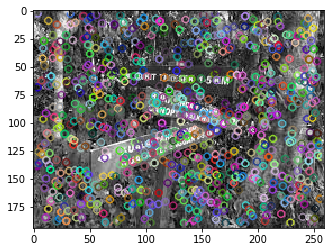

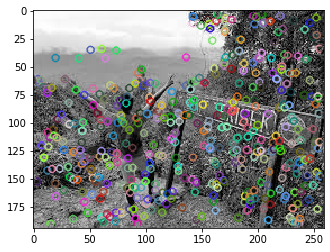

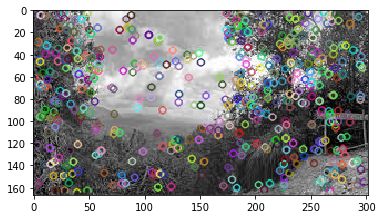

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

def show_images_from_folder(folder):
    for filename in os.listdir(folder):
        img1 = cv2.imread(os.path.join(folder,filename))
        gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        sift = cv2.xfeatures2d.SIFT_create()
        keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
        img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
        plt.imshow(img_1, interpolation='nearest')
        plt.show()

img_ex = show_images_from_folder('/content/drive/MyDrive/Colab Notebooks/data/dataset/bukit/bukit_tresek')

In [9]:
from fcmeans import FCM
def fcmeans(f, descriptor_list):
  fcm = FCM(n_clusters=f)
  fcm.fit(np.array(descriptor_list))
  visual_words_fc = fcm.centers
  return visual_words_fc

visual_words_fc = fcmeans(150, descriptor_list)

In [10]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
             count = distance.euclidean(image, center[i]) 
             #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i]) 
            #dist = L1_dist(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

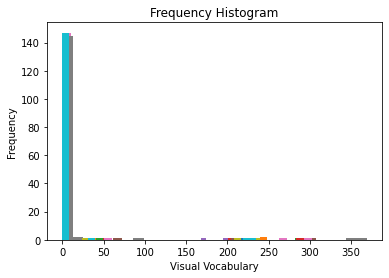

In [11]:
def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            category.append(histogram)
        dict_feature[key] = category
    return category
    
# Creates histograms for train data    
bovw = image_class(all_bovw_feature, visual_words_fc) 
# Creates histograms for test data
#bovw_test = image_class(test_bovw_feature, visual_words_fc) 
for i in range(len(images2)):
  plt.hist(bovw[i], bins=30)    
  plt.title("Frequency Histogram")
  plt.xlabel("Visual Vocabulary")
  plt.ylabel("Frequency")

Multidimensional Scaling (MDS) and Probability Density Function

In [12]:
from sklearn.manifold import MDS
from scipy import stats
from scipy.stats import norm
import operator

def mds_and_pdf():
    for i in range(len(bovw)):
        embedding = MDS(n_components=1)
        pop = bovw[i].reshape(-1,1)
        X_transformed = embedding.fit_transform(pop[:100])
        probability = stats.norm.pdf(X_transformed)
    index, value = max(enumerate(probability), key=operator.itemgetter(1))
    max_pdf = probability.max()
    index2, value2 = min(enumerate(probability), key=operator.itemgetter(1))
    min_pdf = probability.min()
    return [max_pdf, index, min_pdf, index2]

max_pdf = mds_and_pdf()[0]
index = mds_and_pdf()[1]
min_pdf = mds_and_pdf()[2]
index2 = mds_and_pdf()[3]

The highest pdf is photo 0 : 0.016670100837381078


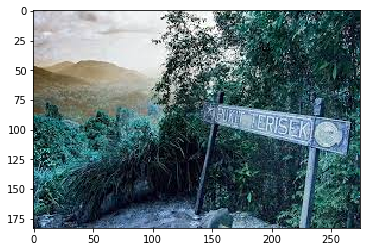

The lowest pdf is photo 22 : 0.0


IndexError: ignored

In [13]:
print("The highest pdf is photo", index,":",max_pdf)
plt.imshow(images2[index], interpolation='nearest')
plt.show()

print("The lowest pdf is photo", index2,":", min_pdf)
plt.imshow(images2[index2], interpolation='nearest')
plt.show()

In [ ]:
pip install opencv-contrib-python==3.4.2.17

In [ ]:
pip install fuzzy-c-means